In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from collections import Counter
import random
path = "./Datasets/Saber_reducido.csv"

In [2]:
Keys = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL"]

In [3]:
tmp = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA ","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA COLE_BILINGUE","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL",
]

for element in Keys:
    if element not in tmp:
        print(element)


ESTU_DEDICACIONLECTURADIARIA
COLE_NATURALEZA


In [48]:
data = pd.read_csv(path, low_memory=False)

In [60]:
data.head()

,ELECTRODOMESTICOS,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,10010,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,...,MAÑANA,63,69,54,57,65.0,305,2.0,53.169929,NSE3
1,10010,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,...,UNICA,54,50,50,40,48.0,242,2.0,45.062853,NSE2
2,0,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,...,MAÑANA,59,43,46,45,47.0,241,2.0,44.806936,NSE2
3,11101,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,...,MAÑANA,61,60,60,67,63.0,310,3.0,73.630225,NSE4
4,10000,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,...,COMPLETA,56,51,48,49,56.0,257,3.0,49.391007,NSE2


In [61]:
data.iloc[0]

ELECTRODOMESTICOS                                                       10010
ESTU_GENERO                                                                 M
ESTU_FECHANACIMIENTO                                                       16
PERIODO                                                                 20182
ESTU_DEPTO_RESIDE                                                   ATLANTICO
FAMI_ESTRATOVIVIENDA                                                Estrato 2
FAMI_PERSONASHOGAR                                                      7 a 8
FAMI_CUARTOSHOGAR                                                      Cuatro
FAMI_EDUCACIONPADRE                                                   No sabe
FAMI_EDUCACIONMADRE                                                   No sabe
FAMI_TRABAJOLABORPADRE           Es vendedor o trabaja en atención al público
FAMI_TRABAJOLABORMADRE           Es vendedor o trabaja en atención al público
FAMI_NUMLIBROS                                                26

In [96]:
data.groupby("ESTU_DEPTO_RESIDE").size()  

ESTU_DEPTO_RESIDE
-                     461
AMAZONAS             1639
ANTIOQUIA          138404
ARAUCA               5818
ATLANTICO           62017
BOGOTA             172479
BOLIVAR             49104
BOYACA              32780
CALDAS              19777
CAQUETA              8079
CASANARE            10942
CAUCA               26708
CESAR               25625
CHOCO                8635
CORDOBA             38928
CUNDINAMARCA        68791
EXTRANJERO              3
GUAINIA               437
GUAVIARE             1820
HUILA               27582
LA GUAJIRA          15563
MAGDALENA           31748
META                23405
NARIÑO              32266
NORTE SANTANDER     29922
PUTUMAYO             8206
QUINDIO             13339
RISARALDA           20314
SAN ANDRES           1245
SANTANDER           49670
SUCRE               20891
TOLIMA              32763
VALLE               75369
VAUPES                651
VICHADA               919
dtype: int64

In [97]:
type(data.groupby("FAMI_NUMLIBROS").size())

pandas.core.series.Series

In [106]:
data.groupby("ESTU_GENERO").get_group('-').index.values

array([ 548477,  608990,  869415,  950709, 1029787], dtype=int64)

In [84]:
data.groupby("FAMI_TRABAJOLABORMADRE").size() 

FAMI_TRABAJOLABORMADRE
-                                                                                                        27174
Es agricultor, pesquero o jornalero                                                                      29480
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                             15886
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc     89710
Es operario de máquinas o conduce vehículos (taxita, chofer)                                             16872
Es vendedor o trabaja en atención al público                                                             80038
No aplica                                                                                                48909
No sabe                                                                                                  25461
Pensionado                                                                               

In [82]:
data.groupby("FAMI_EDUCACIONMADRE").size()

FAMI_EDUCACIONMADRE
-                                        51826
Educación profesional completa          103152
Educación profesional incompleta         24423
Ninguno                                  21119
No Aplica                                 1675
No sabe                                  17413
Postgrado                                20675
Primaria completa                       112091
Primaria incompleta                     156941
Secundaria (Bachillerato) completa      259109
Secundaria (Bachillerato) incompleta    156207
Técnica o tecnológica completa          100802
Técnica o tecnológica incompleta         30867
dtype: int64

In [81]:
data.groupby("FAMI_EDUCACIONPADRE").size()

FAMI_EDUCACIONPADRE
-                                        52058
Educación profesional completa           90835
Educación profesional incompleta         19861
Ninguno                                  34490
No Aplica                                 9864
No sabe                                  61730
Postgrado                                18157
Primaria completa                       110972
Primaria incompleta                     199691
Secundaria (Bachillerato) completa      223565
Secundaria (Bachillerato) incompleta    145632
Técnica o tecnológica completa           68580
Técnica o tecnológica incompleta         20865
dtype: int64

In [80]:
data.groupby("FAMI_CUARTOSHOGAR").size()

FAMI_CUARTOSHOGAR
-              25572
Cinco          42019
Cuatro        137555
Dos           369150
Seis o mas     22640
Tres          405718
Uno            53646
dtype: int64

In [79]:
data.groupby("FAMI_PERSONASHOGAR").size()

FAMI_PERSONASHOGAR
-           27460
1 a 2       74408
3 a 4      490759
5 a 6      337252
7 a 8       90041
9 o más     36380
dtype: int64

## Histogramas

In [62]:
data.groupby("COLE_JORNADA").size()

COLE_JORNADA
COMPLETA    191426
MAÑANA      544050
NOCHE        51132
SABATINA     56621
TARDE       137263
UNICA        75808
dtype: int64

In [63]:
data.groupby("FAMI_ESTRATOVIVIENDA").size()/data.shape[0] * 100

FAMI_ESTRATOVIVIENDA
Estrato 1      33.156395
Estrato 2      36.604090
Estrato 3      20.448073
Estrato 4       4.727066
Estrato 5       1.578339
Estrato 6       0.775821
Sin Estrato     2.710215
dtype: float64

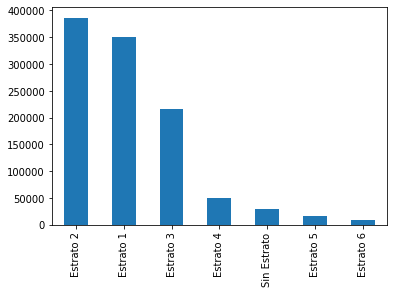

In [64]:
data['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar')

In [65]:
data.groupby("ESTU_FECHANACIMIENTO").size()

ESTU_FECHANACIMIENTO
14      1427
15     38604
16    386029
17    349675
18    175409
19     66293
20     22511
21     10203
22      6149
dtype: int64

<class 'matplotlib.axes._subplots.AxesSubplot'>


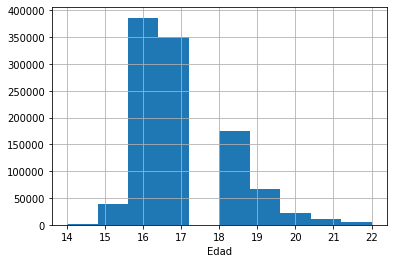

In [66]:
hist = data["ESTU_FECHANACIMIENTO"].hist()
hist.set_xlabel("Edad")
print(type(hist))

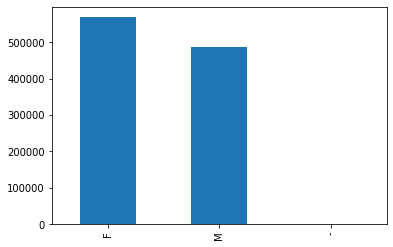

In [67]:
data['ESTU_GENERO'].value_counts().plot(kind='bar')

In [68]:
#data.groupby("ESTU_INSE_INDIVIDUAL").size()
print("min",data["ESTU_INSE_INDIVIDUAL"].min())
print("max",data["ESTU_INSE_INDIVIDUAL"].max())


min 12.53886749
max 84.83636609


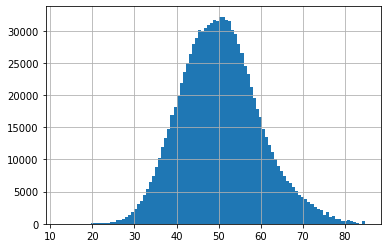

In [69]:
data['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

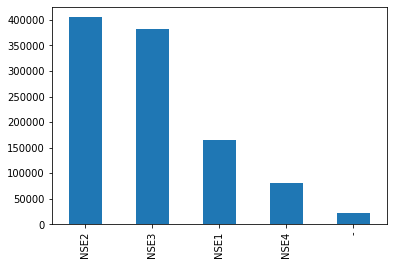

In [70]:
data["ESTU_NSE_INDIVIDUAL"].value_counts().plot(kind ='bar')

In [73]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()

ESTU_NSE_INDIVIDUAL
-        22301
NSE1    165548
NSE2    404864
NSE3    382142
NSE4     81445
dtype: int64

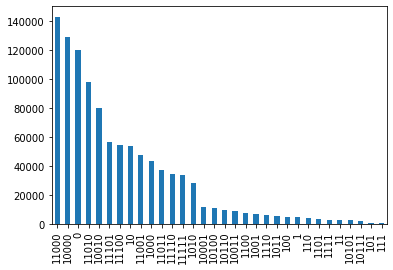

In [71]:
data["ELECTRODOMESTICOS"].value_counts().plot(kind ='bar')

In [54]:
data.groupby("ELECTRODOMESTICOS").size().sort_values(ascending=False)/data.shape[0]*100

ELECTRODOMESTICOS
11000    13.544732
10000    12.205907
0        11.345640
11010     9.307772
10010     7.570671
11101     5.349522
11100     5.158099
10        5.079902
11001     4.532993
1000      4.108776
11011     3.527786
11110     3.242166
11111     3.212724
1010      2.667045
10001     1.117012
10100     1.039667
10110     0.922749
10011     0.877686
1100      0.725930
1001      0.625391
1110      0.557512
1011      0.507337
100       0.475717
1         0.425447
110       0.409827
1101      0.335889
1111      0.289028
11        0.274922
10101     0.230995
10111     0.211966
101       0.062861
111       0.056329
dtype: float64

In [55]:
0.274922+0.230995+0.211966+0.062861+0.056329

0.8370729999999998

In [56]:
0.557512+0.507337+0.475717+0.425447+0.409827+0.335889+0.289028+0.274922+0.230995+0.211966+0.062861+0.056329

3.83783

In [58]:
3.83783*data.shape[0]/100

40538.998289999996

In [72]:
data.shape

(1056300, 31)

In [ ]:
print(data.PUNT_GLOBAL.corr(data.ESTU_NSE_INDIVIDUAL, method="pearson"))

## Diagramas de caja

Text(0.5, 0, 'Edad')

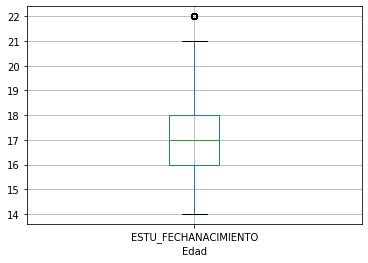

In [47]:
hist = data.boxplot(column=['ESTU_FECHANACIMIENTO'])
hist.set_xlabel("Edad")

In [31]:
dataAge = data[data['ESTU_FECHANACIMIENTO'] > 22]
dataAge.groupby("ESTU_FECHANACIMIENTO").size()/data.shape[0]*100

ESTU_FECHANACIMIENTO
23    0.398030
24    0.312850
25    0.255073
26    0.214574
27    0.204077
28    0.190330
29    0.165343
30    0.141006
dtype: float64

## tabla de contingencia

In [38]:
pd.crosstab(data['FAMI_TIENESERVICIOTV'], [data['FAMI_TIENECOMPUTADOR']])/data.shape[0]*100

FAMI_TIENECOMPUTADOR,-,No,Si
FAMI_TIENESERVICIOTV,,,
-,1.376337,2.109975,2.023495
No,0.287863,14.776421,7.796086
Si,0.768936,23.548399,47.312487


In [39]:
pd.crosstab(data['FAMI_EDUCACIONPADRE'], [data['FAMI_EDUCACIONMADRE']])/data.shape[0]*100

FAMI_EDUCACIONMADRE,-,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
FAMI_EDUCACIONPADRE,,,,,,,,,,,,,
-,4.883550,0.019135,0.004459,0.006224,0.000650,0.002972,0.002415,0.031675,0.044401,0.066601,0.038177,0.023780,0.008174
Educación profesional completa,0.017370,3.796190,0.512190,0.019600,0.012819,0.102178,0.417072,0.143421,0.156147,1.383304,0.442245,1.219448,0.249407
Educación profesional incompleta,0.004923,0.421252,0.319910,0.007896,0.006781,0.021457,0.089452,0.046352,0.041800,0.359852,0.148623,0.290929,0.097534
Ninguno,0.021364,0.050160,0.019878,0.890992,0.007803,0.027124,0.007431,0.468625,1.033762,0.383260,0.417258,0.066787,0.045609
No Aplica,0.001951,0.100042,0.026473,0.013562,0.047373,0.017184,0.026659,0.087409,0.121406,0.221169,0.130788,0.109702,0.032418
No sabe,0.011797,0.560585,0.143885,0.053597,0.013562,0.906783,0.097534,0.475035,0.648551,1.357202,0.818446,0.577491,0.155589
Postgrado,0.002136,0.481165,0.081742,0.002415,0.004737,0.019042,0.726300,0.013655,0.012912,0.123450,0.035762,0.157261,0.032233
Primaria completa,0.026288,0.272351,0.075333,0.218475,0.008824,0.067530,0.034183,3.503590,1.789322,2.273738,1.641257,0.466303,0.166643
Primaria incompleta,0.040593,0.332171,0.096047,0.600714,0.014398,0.107658,0.035948,2.985083,8.199503,2.929071,2.962232,0.586873,0.214109


# Entropia

In [ ]:
columnEval = ["FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS"]

In [ ]:
def EntropySum(n):
    if n == 0:
        return 0
    if n == 1:
        return 0
    else:
        return n*math.log(n,2)+(1-n)*math.log(1-n,2)

def compare(i,j,colPass):
    count = 0
    for col in columnEval:
        if data.iloc[i][col] == data.iloc[j][col]:
            if col != colPass:
                count+=1
    return count

In [ ]:
entropy = 0
dataSize = 1000 #data.shape[0]
for i in range(dataSize):
    for j in range(i+1,dataSize):
        result = compare(i, j, "")
        entropy += EntropySum(result/data.shape[1])
        #if j%100 == 0:
        #    print("R",i,j,"=",result)
    print("R",i,j,"=",entropy)
print("EntropyTotal",entropy*-1)